In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset=pd.read_csv(r"D:\Vinit\python\data science\salary prediction\Salary_Data.csv")

In [4]:
dataset.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


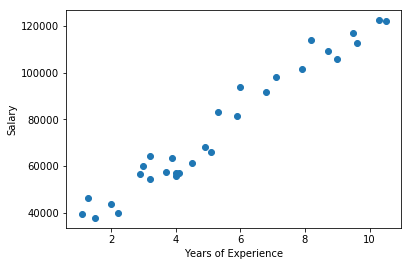

In [5]:
plt.scatter(dataset['YearsExperience'],dataset['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [6]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [7]:
x


array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [8]:
y


array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=101)

In [11]:
x_train


array([[ 3.9],
       [ 2. ],
       [ 1.3],
       [ 6. ],
       [ 7.9],
       [ 4. ],
       [ 2.9],
       [ 4.5],
       [ 1.1],
       [ 7.1],
       [ 2.2],
       [ 3.2],
       [ 4.1],
       [ 3.7],
       [ 4.9],
       [10.5],
       [ 8.2],
       [ 3. ],
       [ 5.3],
       [ 4. ]])

In [12]:
x_train.size

20

In [13]:
x_test

array([[ 6.8],
       [ 8.7],
       [ 3.2],
       [ 5.9],
       [ 1.5],
       [ 9.6],
       [ 9.5],
       [ 5.1],
       [ 9. ],
       [10.3]])

In [14]:
y_train

array([ 63218.,  43525.,  46205.,  93940., 101302.,  56957.,  56642.,
        61111.,  39343.,  98273.,  39891.,  64445.,  57081.,  57189.,
        67938., 121872., 113812.,  60150.,  83088.,  55794.])

In [15]:
y_test

array([ 91738., 109431.,  54445.,  81363.,  37731., 112635., 116969.,
        66029., 105582., 122391.])

Linear regression

In [16]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [17]:
LR.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred_LR=LR.predict(x_test)

In [19]:
y_pred_LR

array([ 91477.92796603, 109893.22802466,  56585.7804865 ,  82754.89109615,
        40108.93306562, 118616.26489454, 117647.03857567,  75001.08054514,
       112800.90698129, 125400.84912667])

In [20]:
x_test

array([[ 6.8],
       [ 8.7],
       [ 3.2],
       [ 5.9],
       [ 1.5],
       [ 9.6],
       [ 9.5],
       [ 5.1],
       [ 9. ],
       [10.3]])

In [21]:
diff_LR = y_test-y_pred_LR

In [22]:
res_df = pd.concat([pd.Series(y_pred_LR),pd.Series(y_test),pd.Series(diff_LR)],axis=1)
res_df.columns=['Prediction','Original','Difference']

In [23]:
res_df

,Prediction,Original,Difference
0,91477.927966,91738.0,260.072034
1,109893.228025,109431.0,-462.228025
2,56585.780487,54445.0,-2140.780487
3,82754.891096,81363.0,-1391.891096
4,40108.933066,37731.0,-2377.933066
5,118616.264895,112635.0,-5981.264895
6,117647.038576,116969.0,-678.038576
7,75001.080545,66029.0,-8972.080545
8,112800.906981,105582.0,-7218.906981
9,125400.849127,122391.0,-3009.849127


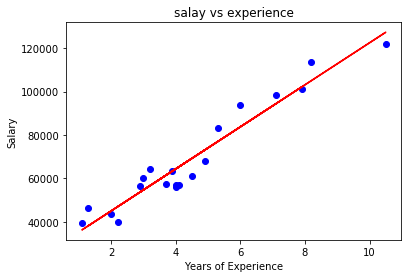

In [24]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,LR.predict(x_train),color='red')
plt.title('salay vs experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

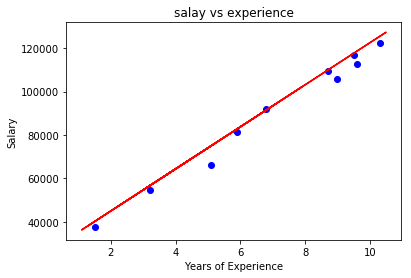

In [25]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_train,LR.predict(x_train),color='red')
plt.title('salay vs experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

#metrics

In [26]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
R2=metrics.r2_score(y_test,y_pred_LR)

In [27]:
rmse

4363.043260343273

In [28]:
R2

0.974811112371526

In [29]:
LR.predict([[6.8]])

array([91477.92796603])

In [30]:
LR.predict([[1]])

array([35262.80147124])

In [31]:
LR.predict([[3]])

array([54647.32784875])

#Decision tree Regressor

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
DT=DecisionTreeRegressor()

In [34]:
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [35]:
y_pred_dt=DT.predict(x_test)

In [36]:
y_test

array([ 91738., 109431.,  54445.,  81363.,  37731., 112635., 116969.,
        66029., 105582., 122391.])

In [37]:
y_pred_dt

array([ 98273., 113812.,  64445.,  93940.,  46205., 121872., 121872.,
        67938., 113812., 121872.])

In [38]:
diff_DT = y_test-y_pred_LR

In [39]:
res_dt= pd.concat([pd.Series(y_pred_dt),pd.Series(y_test),pd.Series(diff_DT)],axis=1)
res_dt.columns=['predicction','Original','difference']

In [40]:
res_dt

,predicction,Original,difference
0,98273.0,91738.0,260.072034
1,113812.0,109431.0,-462.228025
2,64445.0,54445.0,-2140.780487
3,93940.0,81363.0,-1391.891096
4,46205.0,37731.0,-2377.933066
5,121872.0,112635.0,-5981.264895
6,121872.0,116969.0,-678.038576
7,67938.0,66029.0,-8972.080545
8,113812.0,105582.0,-7218.906981
9,121872.0,122391.0,-3009.849127


In [41]:
x_test

array([[ 6.8],
       [ 8.7],
       [ 3.2],
       [ 5.9],
       [ 1.5],
       [ 9.6],
       [ 9.5],
       [ 5.1],
       [ 9. ],
       [10.3]])

In [42]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred_dt))
R2 = metrics.r2_score(y_test,y_pred_dt)

In [43]:
rmse

7568.996703658947

In [44]:
R2

0.9241934760377903

In [45]:
from sklearn import tree

In [47]:
text_representation = tree.export_text(DT)
print(text_representation)

|--- feature_0 <= 5.10
|   |--- feature_0 <= 2.55
|   |   |--- feature_0 <= 1.20
|   |   |   |--- value: [39343.00]
|   |   |--- feature_0 >  1.20
|   |   |   |--- feature_0 <= 2.10
|   |   |   |   |--- feature_0 <= 1.65
|   |   |   |   |   |--- value: [46205.00]
|   |   |   |   |--- feature_0 >  1.65
|   |   |   |   |   |--- value: [43525.00]
|   |   |   |--- feature_0 >  2.10
|   |   |   |   |--- value: [39891.00]
|   |--- feature_0 >  2.55
|   |   |--- feature_0 <= 4.70
|   |   |   |--- feature_0 <= 3.95
|   |   |   |   |--- feature_0 <= 2.95
|   |   |   |   |   |--- value: [56642.00]
|   |   |   |   |--- feature_0 >  2.95
|   |   |   |   |   |--- feature_0 <= 3.80
|   |   |   |   |   |   |--- feature_0 <= 3.45
|   |   |   |   |   |   |   |--- feature_0 <= 3.10
|   |   |   |   |   |   |   |   |--- value: [60150.00]
|   |   |   |   |   |   |   |--- feature_0 >  3.10
|   |   |   |   |   |   |   |   |--- value: [64445.00]
|   |   |   |   |   |   |--- feature_0 >  3.45
|   |   |   |   |

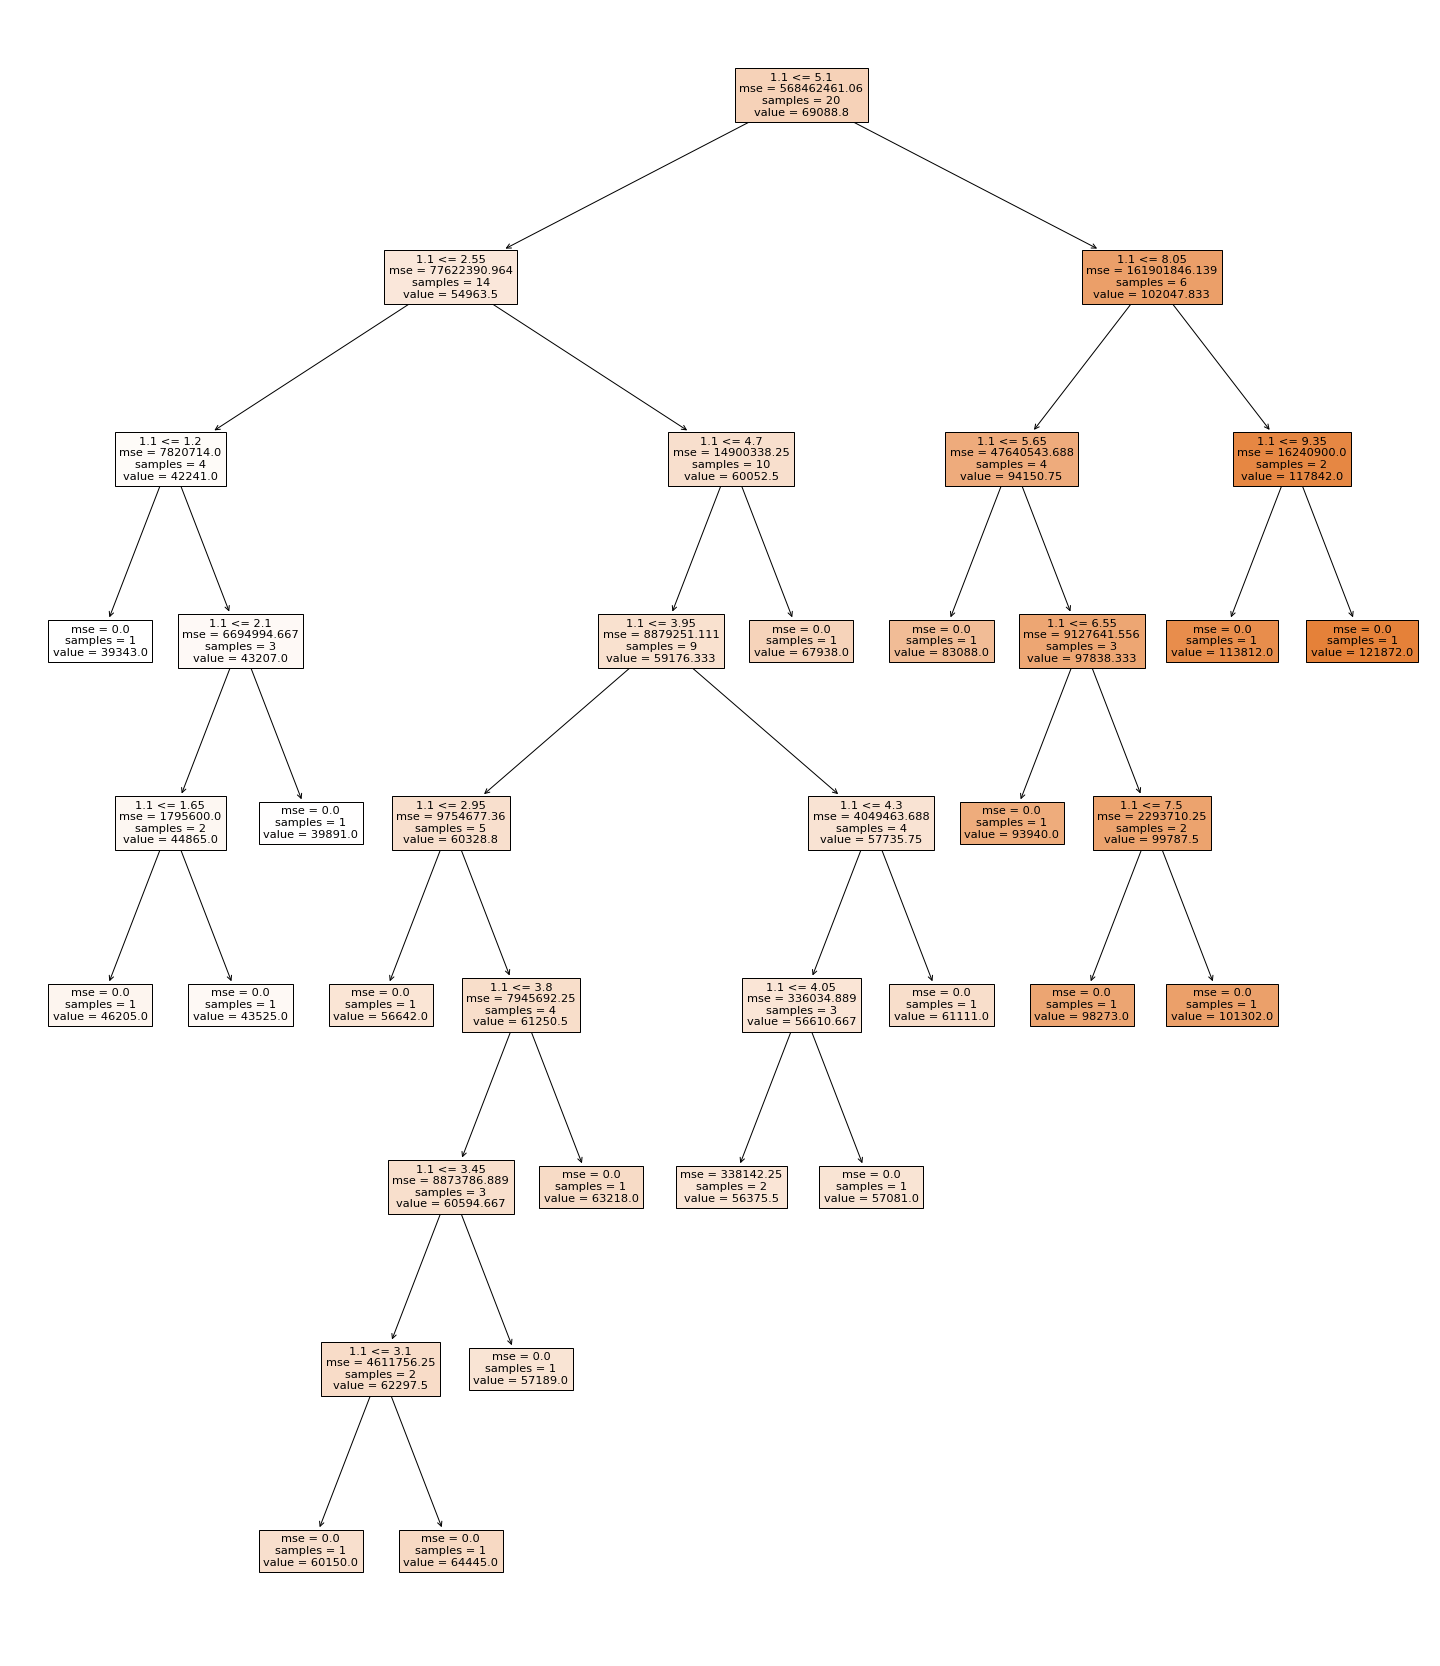

In [50]:
fig = plt.figure(figsize=(25,30))
_=tree.plot_tree(DT,feature_names=dataset['YearsExperience'],filled=True)

In [ ]:
fig.savefig